<a href="https://colab.research.google.com/github/felix123136/Drum-Kit-Website/blob/main/Writing_Hand_Digit_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [ ]:
print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


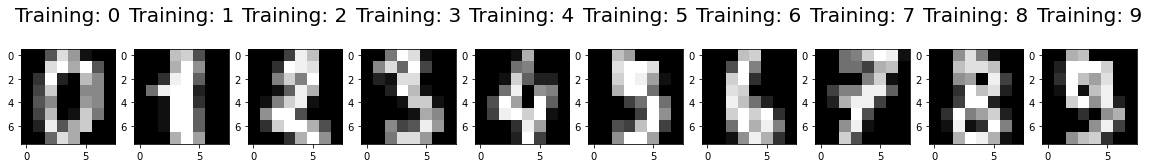

In [ ]:
plt.figure(figsize=(20,4))
for i, (image, label) in enumerate(zip(digits.data[:10], digits.target[:10])):
    plt.subplot(1, 10, i + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

In [ ]:
x_train.shape

(1383, 64)

In [ ]:
y_train.shape

(1383,)

In [ ]:
x_test.shape

(414, 64)

In [ ]:
y_test.shape

(414,)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=5000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
predictions = logisticRegr.predict(x_test)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9492753623188406


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


Text(0.5, 1.0, 'Accuracy Score: 0.9492753623188406')

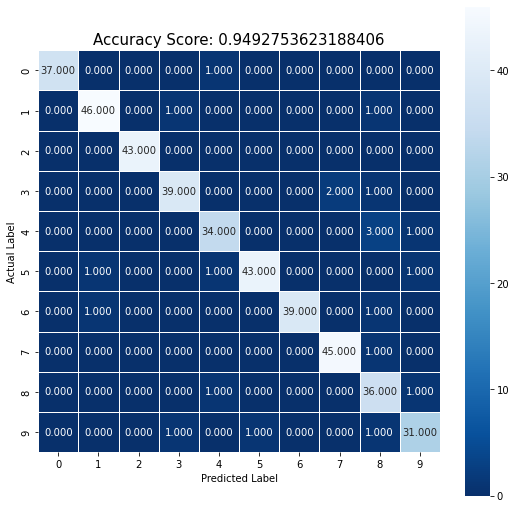

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

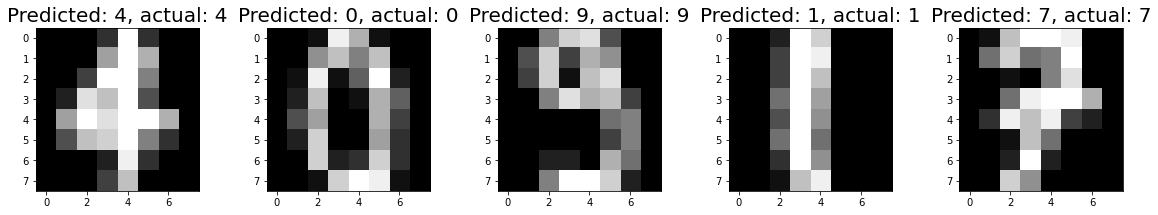

In [ ]:
classifiedIndex = []
for index, (predict, actual) in enumerate(zip(predictions, y_test)):
    if predict == actual:
        classifiedIndex.append(index)

plt.figure(figsize=(20, 3))
for plotIndex, index in enumerate(classifiedIndex[:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[index], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, actual: {}".format(predictions[index], y_test[index]), fontsize=20)